In [363]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")


In [364]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [365]:
train_original =train.copy()
test_original = test.copy()

In [366]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [367]:
test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [368]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [369]:
train.shape ,test.shape

((614, 13), (367, 12))

In [370]:
#univariate analysis
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [371]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

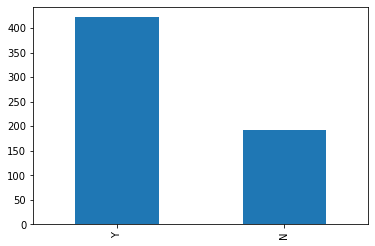

In [372]:
train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

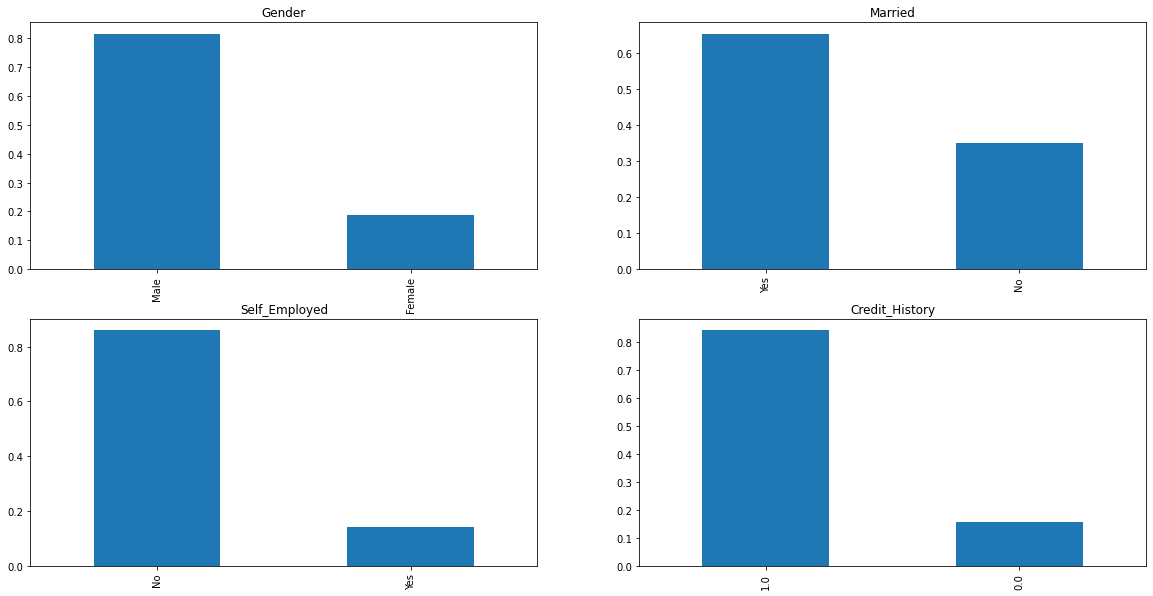

In [373]:
#categorical 
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')


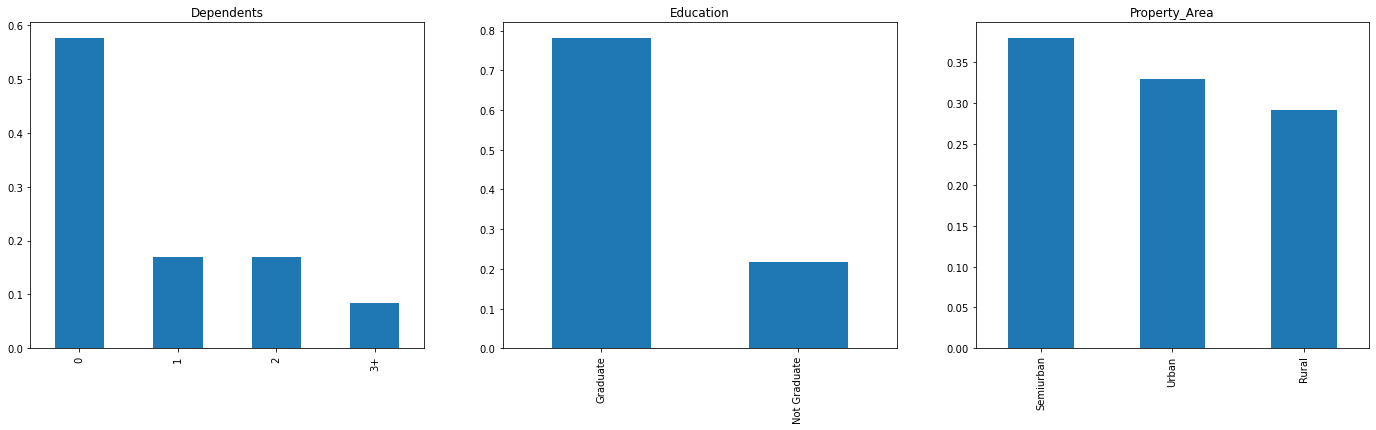

In [374]:
#Ordinal

plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()
    

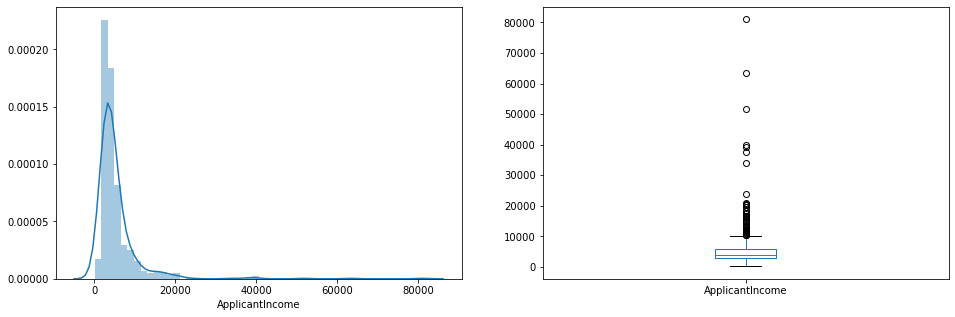

In [375]:
#Numerical

plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, ' ')

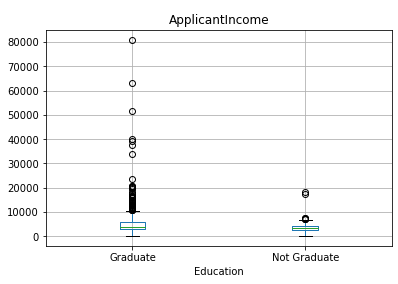

In [376]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle(" ")


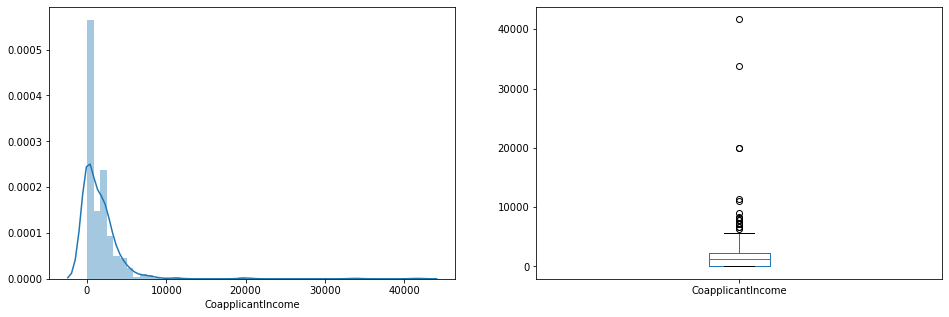

In [377]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

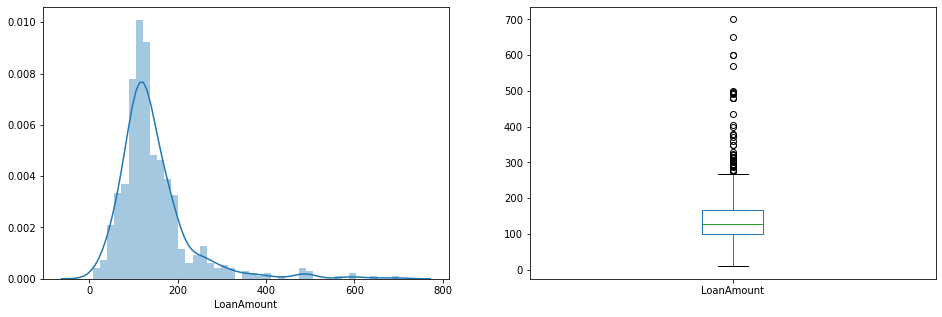

In [378]:
plt.figure(1)

plt.subplot(121)

df=train.dropna()
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()


<AxesSubplot:xlabel='Gender'>

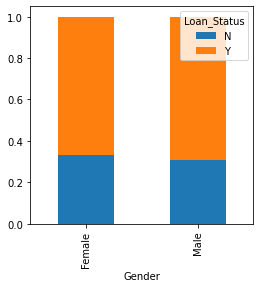

In [379]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True ,figsize=(4,4))

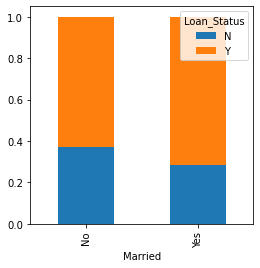

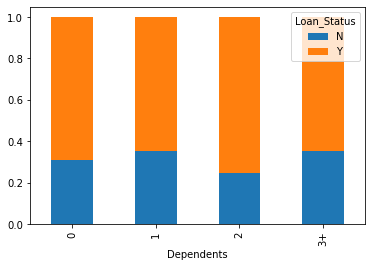

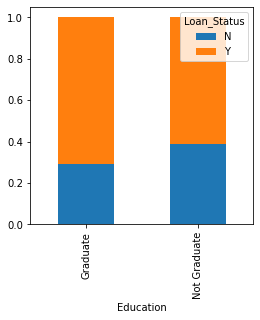

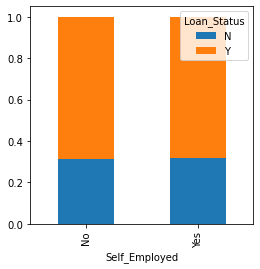

In [380]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked= True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

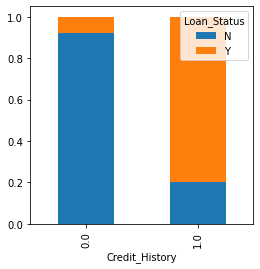

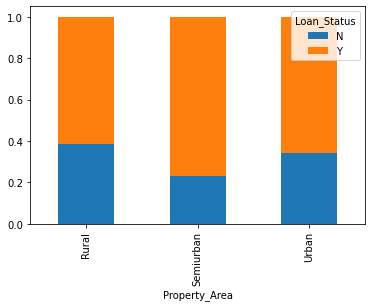

In [381]:
#categorical

Credit_History =pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

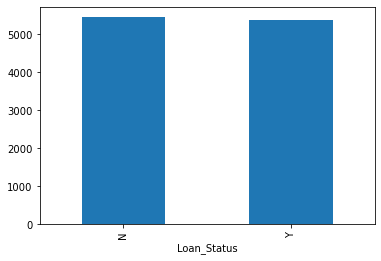

In [382]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

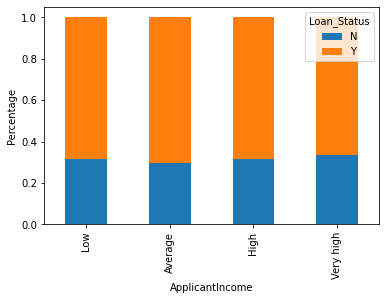

In [383]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

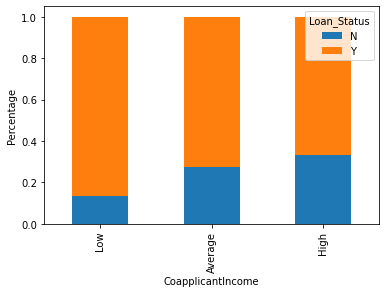

In [384]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')




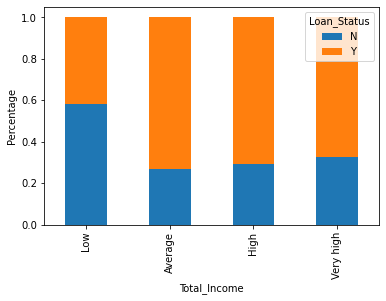

In [385]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

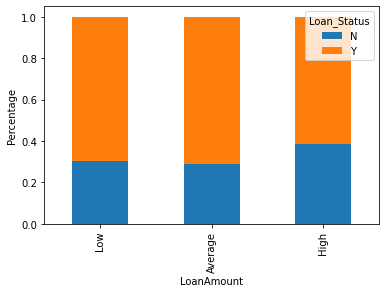

In [386]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


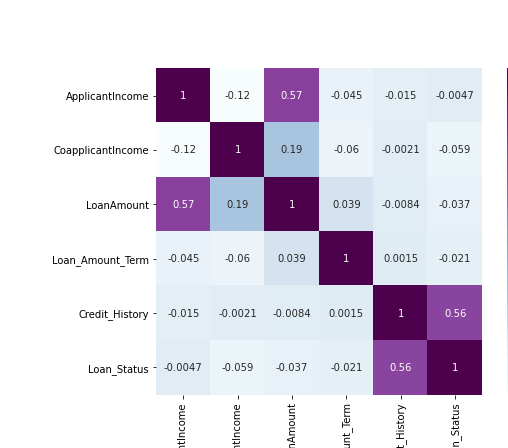

In [387]:
train =train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

matrix =train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)

matrix

In [388]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [389]:
train['Gender'].fillna(train['Gender'].dropna().mode()[0],inplace=True)
train['Married'].fillna(train['Married'].dropna().mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].dropna().mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].dropna().mode()[0],inplace=True)

In [390]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [391]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode()[0],inplace=True)

In [392]:
train['LoanAmount'].fillna(train['LoanAmount'].dropna().median(),inplace=True)

In [393]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [394]:
test['Gender'].fillna(train['Gender'].dropna().mode()[0],inplace =True)
test['Dependents'].fillna(train['Dependents'].dropna().mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].dropna().mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].dropna().mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].dropna().median(),inplace=True)

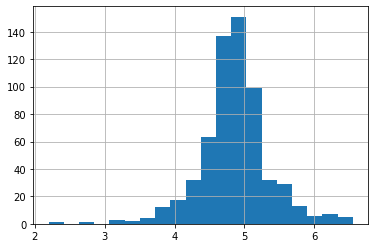

In [395]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [396]:
#EVALUATION OF METRICS
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)


In [397]:
X = train.drop('Loan_Status',axis=1)
y= train.Loan_Status
type(y)

pandas.core.series.Series

In [398]:
X= pd.get_dummies(X)
train=pd.get_dummies(train)
test =pd.get_dummies(test)

In [399]:
from sklearn.model_selection import train_test_split

In [400]:
x_train,x_cv,y_train,y_cv =train_test_split(X,y,test_size=0.3)

In [401]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [402]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [403]:

type(y_train)

pandas.core.series.Series

In [404]:
model=LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1, penalty='l2',random_state=1, solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)




0.7945945945945946

In [405]:
pred_test = model.predict(test)

In [406]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [407]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [414]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [415]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)


In [413]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)